 # Sports Analytics - Olypmics Analysis

### Data Import and Pre-processing

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None) # to display maximum number of columns
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [4]:
# Load the Data
summer = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/summer.csv")
winter = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/winter.csv")
track = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/data.csv")
countries = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/dictionary.csv")

In [5]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [6]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [7]:
track.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m


In [8]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


## Summer Olympics Analysis

In [10]:
summer['Athlete']=summer['Athlete'].str.split(', ').str[::-1].str.join(' ')
summer['Athlete']=summer['Athlete'].str.title()
winter['Athlete']=winter['Athlete'].str.split(', ').str[::-1].str.join(' ')
winter['Athlete']=winter['Athlete'].str.title()

In [11]:
# Merge the two DataFrames
merged_df = pd.merge(summer, countries, how='left', left_on='Country', right_on='Code')
merged_df.head()

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.230578


In [12]:
summer=merged_df[['Year','City','Sport','Discipline','Athlete','Code','Country_y','Gender','Event','Medal']]
summer.rename(columns={'Country_y': 'Country'}, inplace=True)

In [13]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Hungary,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Austria,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Greece,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Greece,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Greece,Men,100M Freestyle For Sailors,Silver


In [14]:
#The Highest Decorated Athlete in Summer Olympic is
print('The Highest Decorated Male Athlete is: ',summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with: ',summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],' medals')
print('The Highest Decorated Female Athlete is: ',summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],'with: ',summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals')

The Highest Decorated Male Athlete is:  Michael Phelps with:  22  medals
The Highest Decorated Female Athlete is:  Larisa Latynina with:  18  medals


**The Highest Decorated Male Athlete is:  Michael Phelps with:  22  medals**

**The Highest Decorated Female Athlete is:  Larisa Latynina with:  18  medals**


In [16]:
medals = summer.groupby(['Athlete', 'Medal']).agg(Count=('Medal', 'size')).reset_index().sort_values(by='Count', ascending=False)
medals

,Athlete,Medal,Count
17344,Michael Phelps,Gold,18
3517,Carl Lewis,Gold,9
16581,Mark Spitz,Gold,9
19224,Paavo Nurmi,Gold,9
14731,Larisa Latynina,Gold,9
...,...,...,...
9532,Harald Sandberg,Bronze,1
9531,Harald S.A. Julin,Silver,1
9529,Harald Oliver Faerstad,Silver,1
9528,Harald Norpoth,Silver,1


In [17]:
# medals by each country
medals_country=summer.groupby(['Country','Medal']).agg(Count=('Medal', 'size')).reset_index().sort_values(by='Count',ascending=False)
medals_country

,Country,Medal,Count
283,United States,Gold,2235
284,United States,Silver,1252
282,United States,Bronze,1098
281,United Kingdom,Silver,621
279,United Kingdom,Bronze,553
...,...,...,...
264,Trinidad and Tobago,Gold,1
75,Ecuador,Gold,1
166,Luxembourg,Gold,1
132,Israel,Gold,1


In [18]:
top=medals_country.Country.unique()[:10]

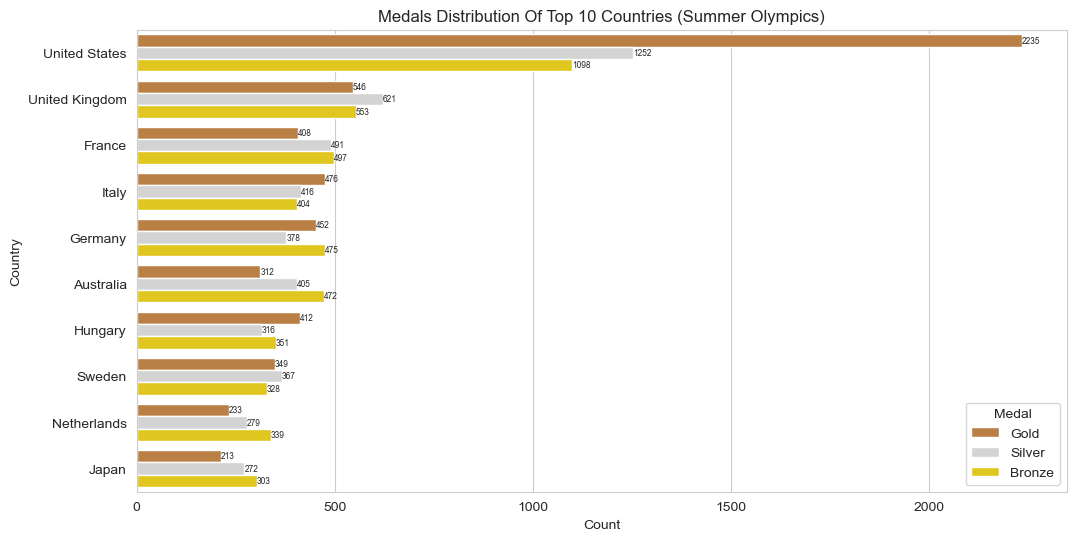

In [19]:
# Filter the DataFrame for the top countries
top_medals_country = medals_country[medals_country['Country'].isin(top)]
# Create the bar plot
plt.figure(figsize=(12, 6))
plot=sns.barplot(data=top_medals_country, x='Count', y='Country', hue='Medal',palette=['#CD7F32','#D3D3D3','#FFDF00'])
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
for i in plot.containers:
    plot.bar_label(i,label_type='edge',fontsize=6)


* * * * 

* **United States:** Dominates the chart with the highest number of Gold, Silver, and Bronze medals, each count exceeding 1000.
* **United Kingdom:** Holds the second position but with significantly fewer medals compared to the United States.
* **France, Italy, and Germany:** These countries have a moderate number of medals, with Germany slightly ahead in the count.
* **Australia, Hungary, Sweden, Netherlands, and Japan:** These countries have relatively fewer medals, with Japan having the least among the listed countries.

In [22]:
#top 10 men Athlete
men=summer[summer['Gender']=='Men']
men=men.groupby(['Athlete','Medal']).agg(Count=('Medal', 'size')).reset_index().sort_values(by='Count',ascending=False)
top_men=men.Athlete.unique()[:10]
men=men[men['Athlete'].isin(top_men)]
#top 10 women Athlete
women=summer[summer['Gender']=='Women']
women=women.groupby(['Athlete','Medal']).agg(Count=('Medal', 'size')).reset_index().sort_values(by='Count',ascending=False)
top_women=women.Athlete.unique()[:10]
women=women[women['Athlete'].isin(top_women)]


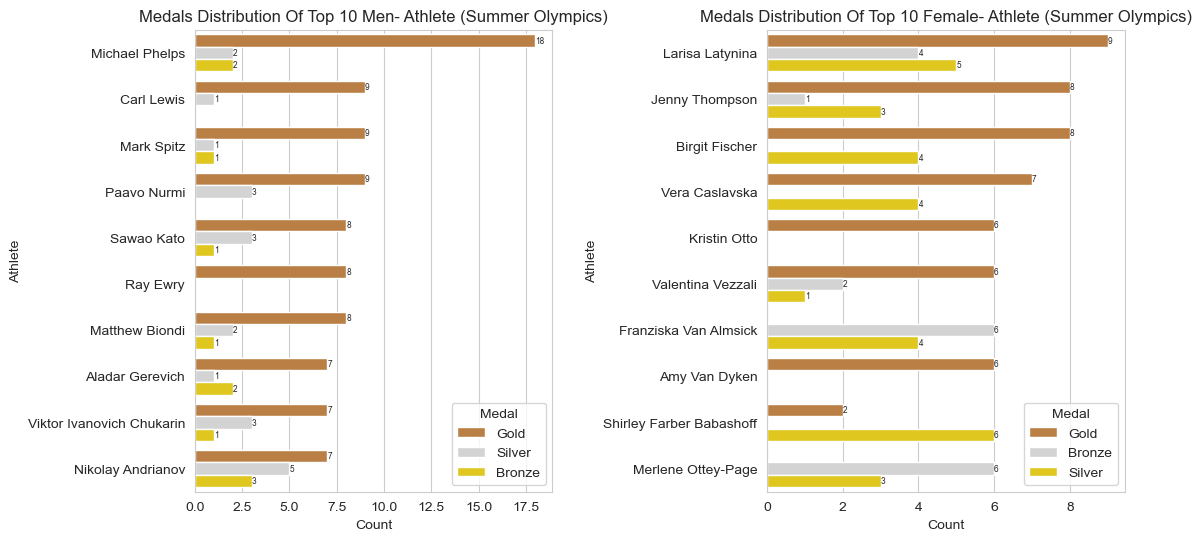

In [23]:
plt.figure(figsize=(12, 6))
count=1
gender='Men'
list=[men,women]
for i in list:
    plt.subplot(1,2,count)
    plot=sns.barplot(data=i, x='Count', y='Athlete', hue='Medal',palette=['#CD7F32','#D3D3D3','#FFDF00'])
    plt.title(f'Medals Distribution Of Top 10 {gender}- Athlete (Summer Olympics)')
    count+=1
    gender='Female'
    for i in plot.containers:
       plot.bar_label(i,label_type='edge',fontsize=6)
plt.subplots_adjust( wspace=0.6, hspace=0.4)  
#plt.savefig('2')
plt.show()


#### Key Findings from Medal Distribution of Top Athletes in the Summer Olympics

##### Men's Athletes
1. **Michael Phelps** is the most decorated male athlete with a total of **18 medals**, including:
   - **2 golds**
   - **2 silvers**
   - **14 bronzes**
   
2. **Carl Lewis**, **Mark Spitz**, and **Paavo Nurmi** each have **9 medals**.

3. The majority of medals for these athletes are bronze, particularly for **Phelps** and **Spitz**.

##### Women's Athletes
1. **Larisa Latynina** leads the female athletes with **9 medals**:
   - **5 golds**
   - **4 silvers**
   
2. **Jenny Thompson** has **8 medals**, including **3 golds**.

3. Other notable athletes include **Birgit Fischer** and **Vera Caslavska**, each with **8 medals**.

##### Overall Trends
- Male athletes tend to have a higher total medal count, with a significant number of bronze medals.
- Female athletes show a strong representation in gold medals, particularly among the top medalists.

This data highlights the extraordinary achievements of both male and female athletes in the Summer Olympics, showcasing their contributions to the sports world.

In [25]:
# discipline by each country
sprt_country=summer.groupby(['Country','Discipline','Medal']).agg(Count=('Medal', 'size')).reset_index().sort_values(by='Count',ascending=False)
# Filter the DataFrame for the top countries
sprt_country = sprt_country[sprt_country['Country'].isin(top)]
sprt_country

,Country,Discipline,Medal,Count
2278,United States,Swimming,Gold,500
2196,United States,Athletics,Gold,491
2197,United States,Athletics,Silver,295
2203,United States,Basketball,Gold,258
2279,United States,Swimming,Silver,232
...,...,...,...,...
875,Germany,Figure skating,Silver,1
1448,Netherlands,Gymnastics Artistic,Gold,1
888,Germany,Jumping,Silver,1
889,Germany,Marathon swimming,Silver,1


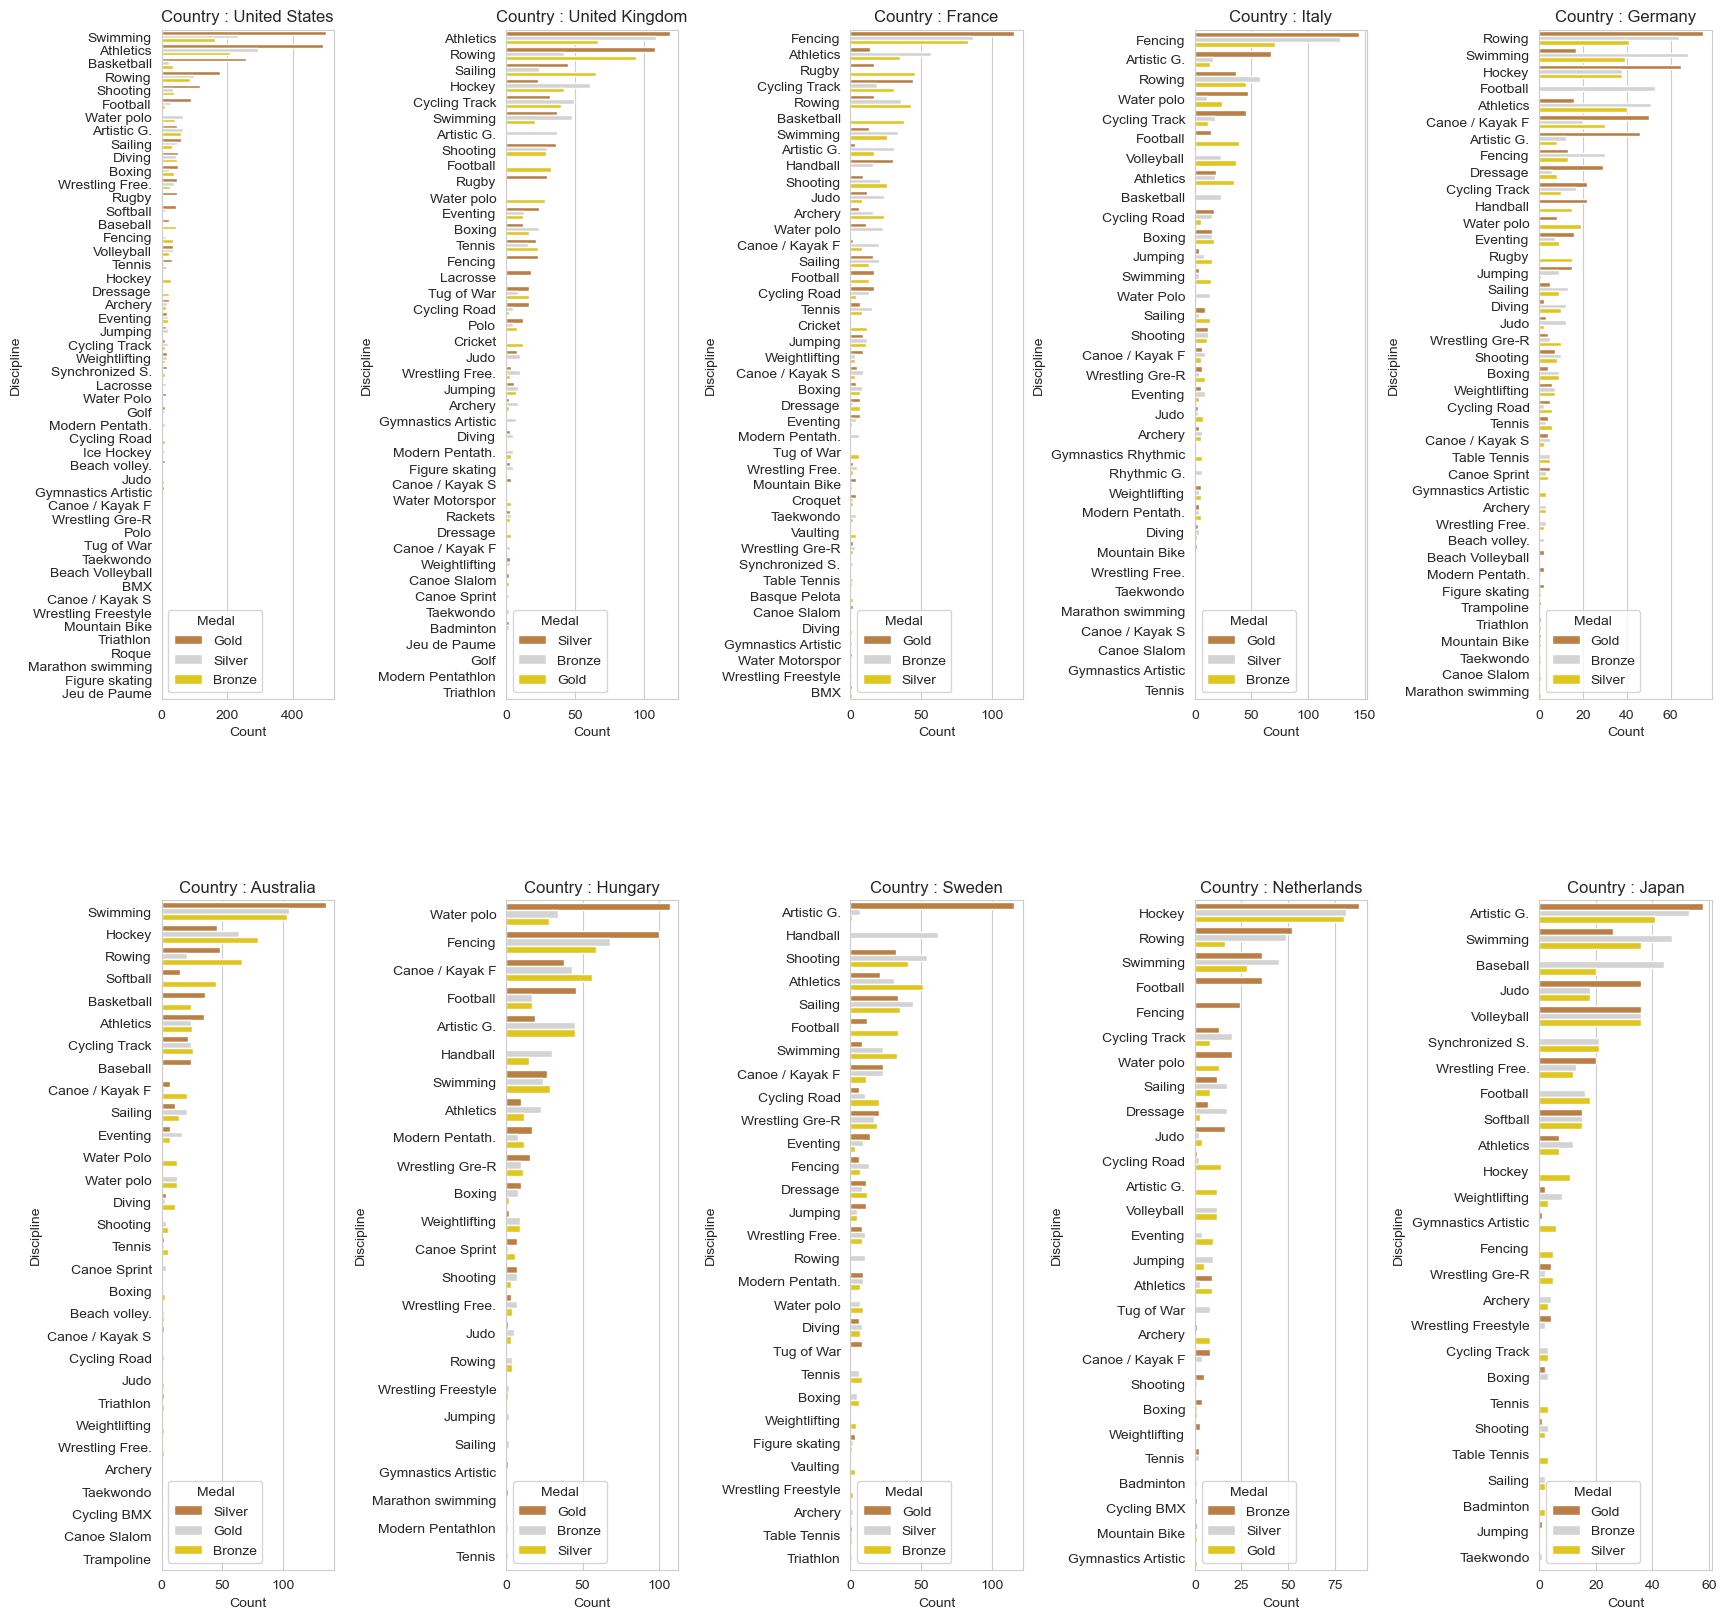

In [26]:
# Create individual bar plots for the top countries
plt.figure(figsize=(20,20))
count=1
for country in top :
    country_data =sprt_country[sprt_country['Country'] == country]
    #subplot
    plt.subplot(2,5,count)
    count+=1
    # Create a bar plot for each country
    sns.barplot(data=country_data, x='Count',y='Discipline', hue='Medal',palette=['#CD7F32','#D3D3D3','#FFDF00'])
    plt.title(f'Country : {country}')
    
# Adjust space between subplots
plt.subplots_adjust(wspace=1, hspace=0.3)  # Adjust as needed
plt.savefig('2')
plt.show()   

#### Key Findings from Medal Distribution by Country

##### United States
- Dominant in **Swimming**, **Athletics**, and **Wrestling**.
- High total medal count across various sports.

##### United Kingdom
- Strong performance in **Cycling**, **Athletics**, and **Rowing**.
- Significant medals in team sports.

##### France
- Notable success in **Fencing**, **Athletics**, and **Cycling**.
- Diverse medal distribution across multiple disciplines.

##### Italy
- Stronghold in **Rowing**, **Wrestling**, and **Cycling**.
- Good representation in artistic sports like **Gymnastics**.

##### Germany
- Competitive in **Athletics**, **Swimming**, and **Cycling**.
- Achievements in team sports such as **Football**.

##### Australia
- Excellence in **Swimming**, **Rowing**, and **Athletics**.
- Notable performance in water sports.

##### Hungary
- Notable for **Water Polo**, **Fencing**, and **Swimming**.
- Strong tradition in combat sports like **Wrestling**.

##### Sweden
- Competitive in **Hockey**, **Swimming**, and **Athletics**.
- Good results in winter sports.

##### Netherlands
- Strong in **Cycling**, **Swimming**, and **Athletics**.
- Competitive in team sports and combat sports.

##### Japan
- Notable for **Judo**, **Wrestling**, and **Baseball**.
- Strong performance in martial arts and traditional sports.

This data illustrates the diverse strengths of each country in various Olympic sports, highlighting their unique athletic capabilities and historical performances.

In [28]:
### Performance of Male and Female Athletes in the Top 5 Countries by Year
# discipline by each country
year_country=summer.groupby(['Country','Year','Gender']).agg(Count=('Athlete', 'size')).reset_index().sort_values(by='Count',ascending=False)
# Filter the DataFrame for the top countries
year_country= year_country[year_country['Country'].isin(top[:5])]
year_country

,Country,Year,Gender,Count
1474,United States,1904,Men,382
1424,United Kingdom,1908,Men,336
1504,United States,1984,Men,202
535,Germany,1936,Men,187
472,France,1900,Men,184
...,...,...,...,...
488,France,1952,Women,1
490,France,1956,Women,1
718,Italy,1964,Women,1
713,Italy,1952,Women,1


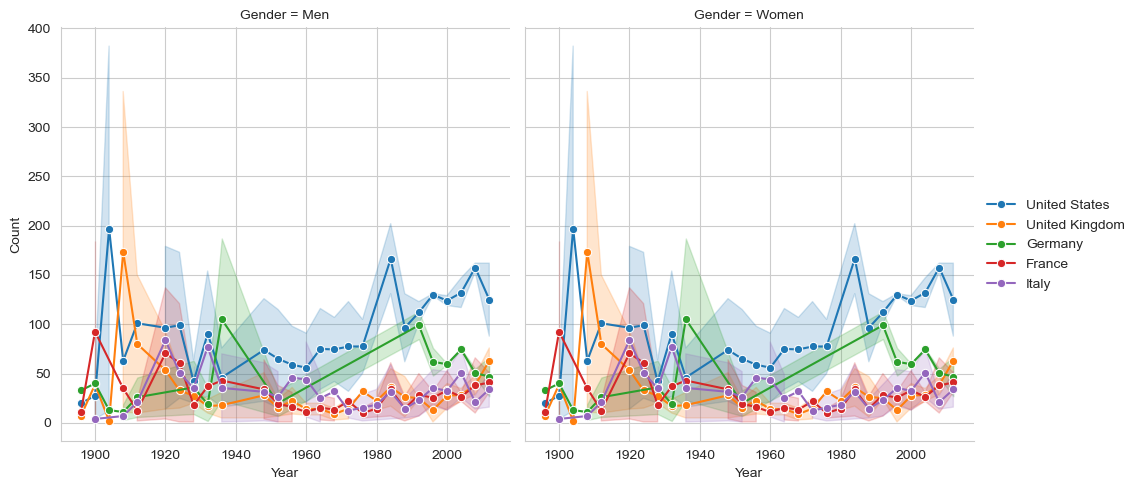

In [29]:
g = sns.FacetGrid(year_country, col='Gender', height=5)
# Map the line plot to the grid with hue
g.map(sns.lineplot,data=year_country,x= 'Year', y='Count', hue='Country',marker='o')
g.add_legend()
plt.savefig('5')


#### Key Findings and Analysis of Olympic Participation by Gender

##### Overview
The visual data represents the changes in Olympic participation counts for male and female athletes from five countries (United States, United Kingdom, Germany, France, and Italy) from 1900 to 2000.

##### Gender: Men
- **Trend Analysis**:
  - There is a notable peak in male participation around the early 1900s, particularly in 1900 and 1920, with counts exceeding 300.
  - Participation fluctuates significantly throughout the decades, with a general downward trend after the 1950s, followed by a mild resurgence in the late 20th century.
  
- **Country Comparisons**:
  - The **United States** consistently leads in male athlete participation, showing the highest counts across most years.
  - The **United Kingdom** and **Germany** also demonstrate significant participation, especially during the mid-20th century.
  - **France** and **Italy** have lower counts but show gradual increases in recent decades.

##### Gender: Women
- **Trend Analysis**:
  - Women’s participation shows a distinct upward trend, particularly from the 1980s onwards, reflecting growing acceptance and opportunities for female athletes.
  - The highest counts occurred around 2000, indicating a significant increase in female representation in the Olympics.

- **Country Comparisons**:
  - The **United States** leads in female participation, with counts consistently above other countries.
  - The **United Kingdom** shows steady growth, with participation rising sharply after 1980.
  - **Germany** and **France** have similar trends, although with lower overall counts compared to the U.S.
  - **Italy** demonstrates a gradual increase, particularly in the last few decades.

##### Conclusion
The data highlights a significant evolution in Olympic participation by gender, with men historically showing higher counts but a notable increase in women's participation over time. The United States remains a dominant force in both categories, while other countries reflect varying trends influenced by cultural and societal changes.

-----------------------------------------------------------------------------------------------------------------------------------------------------------